# TOP 100 KEY WORDS


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

from textblob import TextBlob

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats


from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


In [2]:
air_data.sort_values(by=['review_scores_rating'])

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2864,40597192,https://www.airbnb.com/rooms/40597192,20210629180711,2021-06-30,Family Suite at Outram Park near Chinatown,"Our apartment is modern, comfortable and spaci...",The studio service apartments are only a few m...,https://a0.muscache.com/pictures/miso/Hosting-...,101145755,https://www.airbnb.com/users/show/101145755,...,NaN,NaN,NaN,NaN,f,56,50,6,0,0.05
2932,40873825,https://www.airbnb.com/rooms/40873825,20210629180711,2021-06-30,🌹全新3种独立式公寓🌹STUDIO 4 U🌹safe🎉clean🎉GRAB NOW🎉,NaN,NaN,https://a0.muscache.com/pictures/df55f063-0830...,14818409,https://www.airbnb.com/users/show/14818409,...,NaN,NaN,NaN,NaN,t,16,0,16,0,0.05
2095,32604498,https://www.airbnb.com/rooms/32604498,20210629180711,2021-06-30,Common Room for rent,6 bus stop to Angmokio MRT station (10 minutes...,NaN,https://a0.muscache.com/pictures/f9e9b5f9-8f99...,204895182,https://www.airbnb.com/users/show/204895182,...,NaN,NaN,NaN,NaN,t,1,0,0,1,0.04
825,16054752,https://www.airbnb.com/rooms/16054752,20210629180711,2021-06-30,Common Bed Room Next to NTU,Nearest residence to Nanyang Technological Uni...,NaN,https://a0.muscache.com/pictures/223258f5-52ae...,104193036,https://www.airbnb.com/users/show/104193036,...,NaN,NaN,NaN,NaN,f,2,0,2,0,0.02
1220,21214988,https://www.airbnb.com/rooms/21214988,20210629180711,2021-06-30,Luxury place,New renovated <br />High tech decor <br />Wind...,NaN,https://a0.muscache.com/pictures/9332d3ed-3c39...,149095282,https://www.airbnb.com/users/show/149095282,...,NaN,NaN,NaN,NaN,t,2,0,2,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50664451,https://www.airbnb.com/rooms/50664451,20210629180711,2021-06-30,2BR Entire Apt [Q] ★ 2mins walk to Queenstown MRT,A spacious and fully furnished 2 rooms unit. <...,NaN,https://a0.muscache.com/pictures/63b23295-08b0...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,NaN,f,42,42,0,0,NaN
4234,50665321,https://www.airbnb.com/rooms/50665321,20210629180711,2021-06-30,2BR Entire Apt [E2] ★ 4mins walk to Novena MRT,2BR<br /><br /><b>The space</b><br />Apartment...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,NaN,f,42,42,0,0,NaN
4235,50665577,https://www.airbnb.com/rooms/50665577,20210629180711,2021-06-30,3BR Entire Apt [E2] ★ 4mins walk to Novena MRT,A cozy and fully furnished 3 rooms apartment.<...,NaN,https://a0.muscache.com/pictures/a0c7231d-4ea4...,375967617,https://www.airbnb.com/users/show/375967617,...,NaN,NaN,NaN,NaN,f,42,42,0,0,NaN
4236,50685676,https://www.airbnb.com/rooms/50685676,20210629180711,2021-06-30,2 Bedrooms Apartment,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,50546965,https://www.airbnb.com/users/show/50546965,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [3]:
air_data= air_data[:100]
air_data["description"] = air_data["description"].map(str)

In [4]:
air_data["name"] = air_data["name"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
air_data["name"] = air_data["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(air_data["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()[:25]

In [5]:
top_words.head()

room       35
mrt        16
to         13
in         11
ensuite    11
dtype: int64

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [7]:
print_full(top_words)

room         35
mrt          16
to           13
in           11
ensuite      11
chinatown    10
apartment    10
near          9
orchard       9
mins          8
city          8
singapore     8
walk          7
for           6
bedroom       6
private       6
with          6
apt           5
from          5
expo          5
cozy          5
central       5
cbd           5
the           5
a             5
dtype: int64


In [8]:
top_words = top_words.rename_axis('name').reset_index(name='count')

<AxesSubplot:xlabel='count', ylabel='name'>

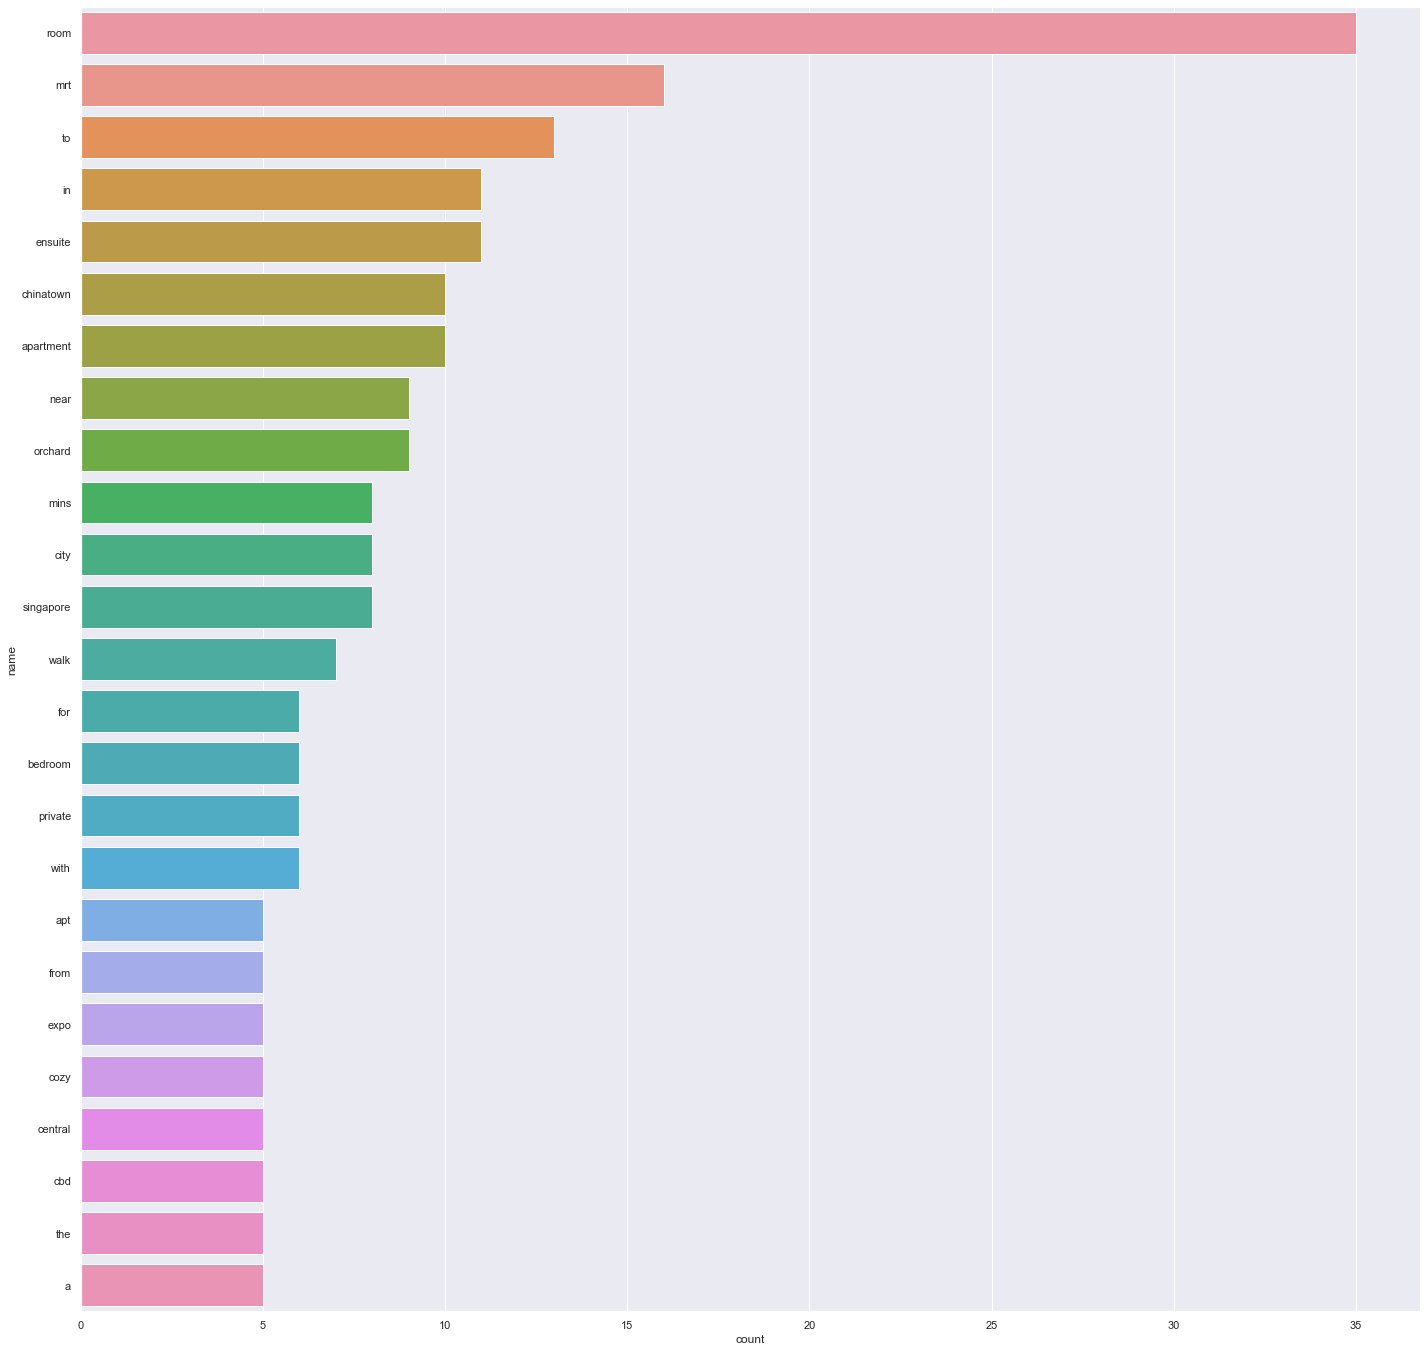

In [9]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="name", data=top_words,orient = "h")